In [4]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

class data:
    
    def __init__(self, filepath: str):
        self.filepath = filepath
        self.data = None
        self.mk_result =None

    def import_data(self):
        self.data = pd.read_csv(self.filepath, index_col=0)
        return self.data

    
    def trend_experiment(self):
        self.mk_result = {}
        for col in self.data.columns:
            series = self.data[col].values
            self.mk_result[col] = mk.original_test(series)

            print(f"{col} | Mann-Kendall Test Result:")
            print("------------------------")
            print(f"Trend       : {self.mk_result[col].trend}")
            print(f"Significant : {self.mk_result[col].h}")
            print(f"P-value     : {self.mk_result[col].p:.4f}")
            print(f"Sen's slope : {self.mk_result[col].slope:.4f}")

    def plot_trend(self):
        """
        ****GPT generated -> plot the data
        Plot Annual Averages and overlay Sen’s slope trend line.
        """
        if self.data is None:
            raise ValueError("Annual Averages not computed. Call compute_yearly_average() first.")
        if self.mk_result is None:
            raise ValueError("Run mann_kendall_test() first to compute Sen’s slope.")

        # Extract data
        years = self.data.index
        idx = range(len(years))

        # Base lineplot

        for i, col in enumerate(self.data.columns):
            if i < 11: color = 'darkred'
            else: color = 'blue'

            y = self.data[col]
            plt.figure(figsize=(8, 5))
            sns.lineplot(x=years, y=y, marker="o", label=f"Annual Avg {col}", color = color)

            # Add Sen’s slope line
            slope = self.mk_result[col].slope
            intercept = self.mk_result[col].intercept
            trend_line = slope * pd.Series(idx) + intercept
            plt.plot(years, trend_line, color="red", linestyle="--", label=f"Sen’s trend: {round(self.mk_result[col].slope,3)} (P-value: {round(self.mk_result[col].p,3)})")

            # Style
            plt.title(f"Annual Average {col}")
            plt.xlabel("Year")
            plt.ylabel(col)
            plt.legend()
            plt.tight_layout()
            plt.show()

    def run_annual_experiments(self):
        self.trend_experiment()
        self.plot_trend()


In [5]:
bio_dataset = data(r'D:\Data-analysis-of-Climate-Change-in-Phillip-Island\resources\BIO\complete_dataset_BIO.csv')
bio_dataset.import_data()
bio_dataset.trend_experiment()

BIO1 | Mann-Kendall Test Result:
------------------------
Trend       : increasing
Significant : True
P-value     : 0.0003
Sen's slope : 0.0197
BIO2 | Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.6490
Sen's slope : -0.0009
BIO3 | Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.9482
Sen's slope : -0.0049
BIO4 | Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.8965
Sen's slope : 0.0400
BIO5 | Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.2418
Sen's slope : 0.0145
BIO6 | Mann-Kendall Test Result:
------------------------
Trend       : increasing
Significant : True
P-value     : 0.0002
Sen's slope : 0.0254
BIO7 | Mann-Kendall Test Result:
------------------------
Trend       : no trend
Significant : False
P-value     : 0.4101
Sen's slope : -0

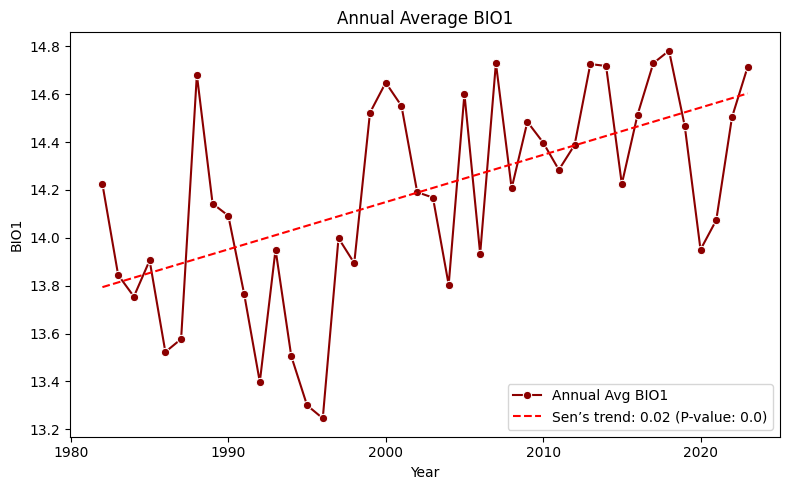

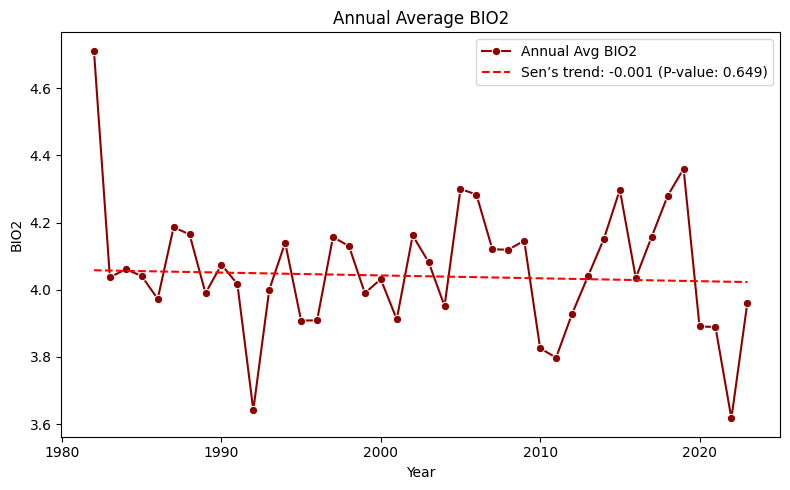

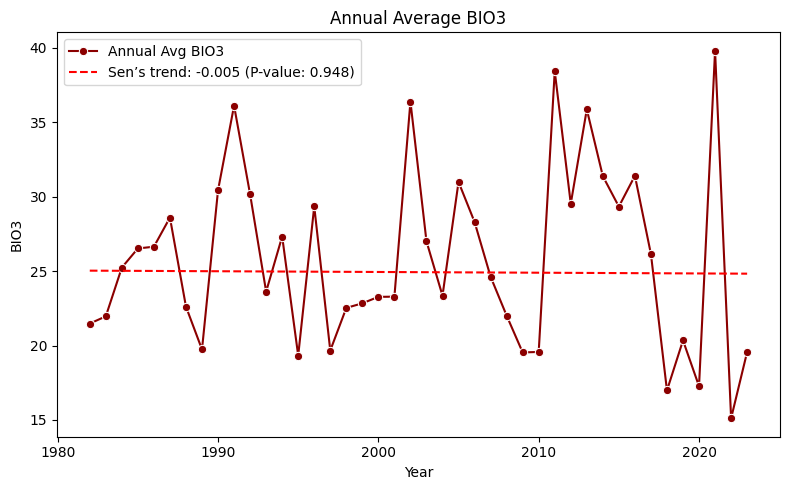

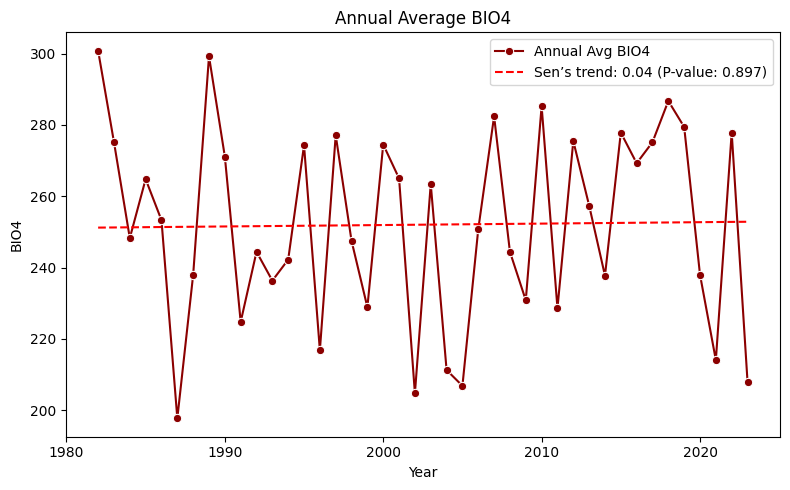

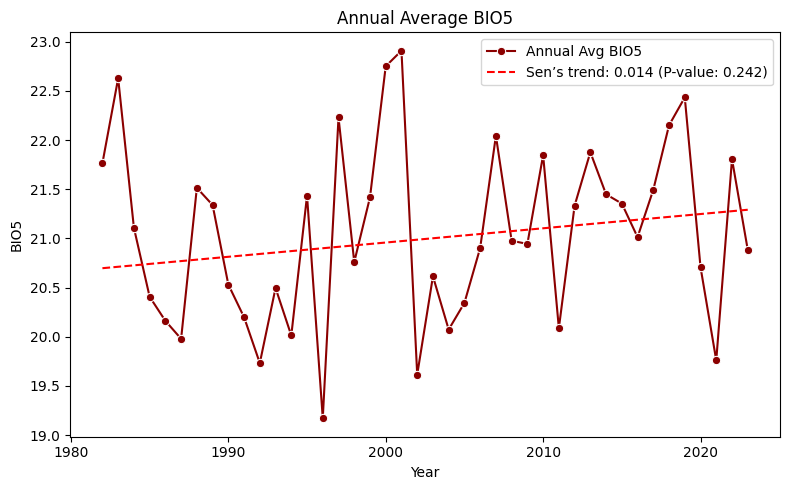

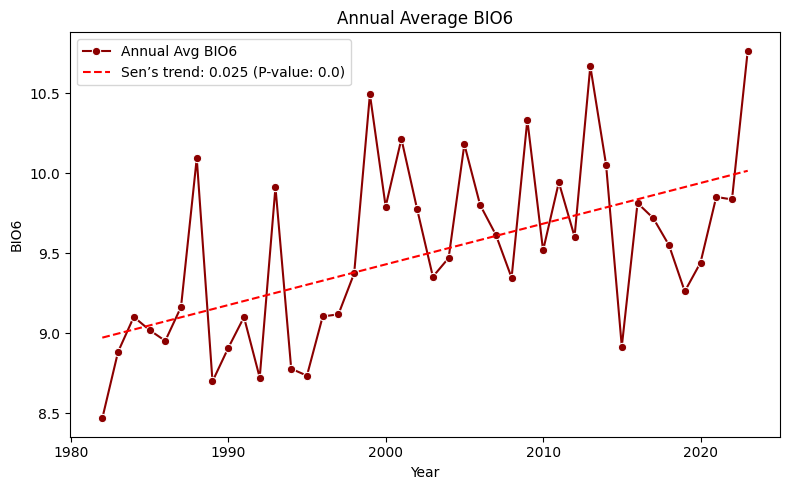

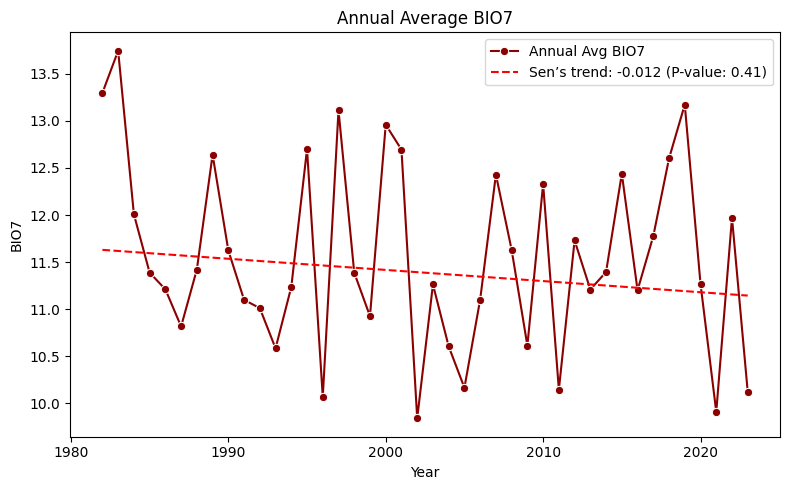

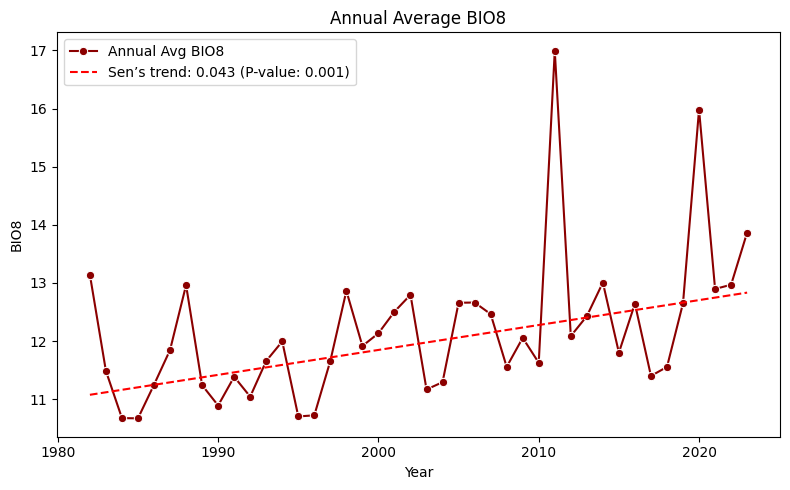

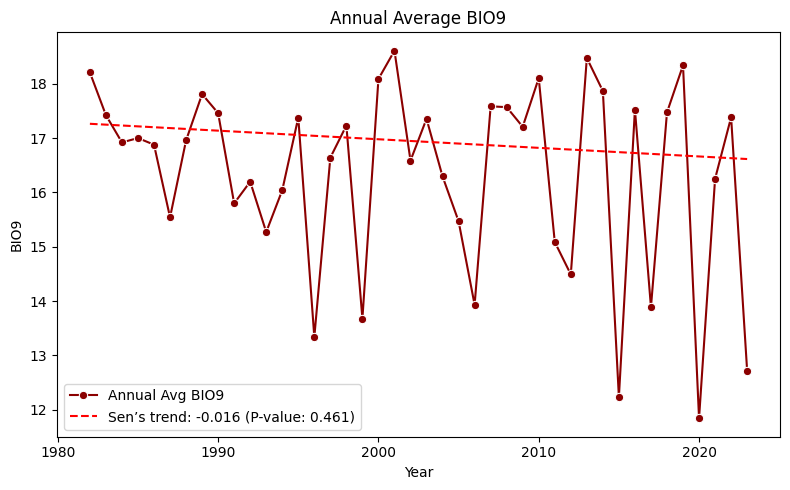

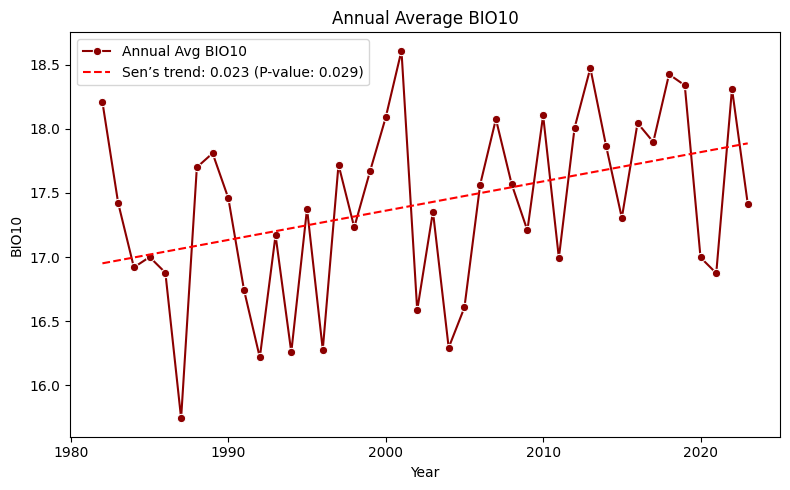

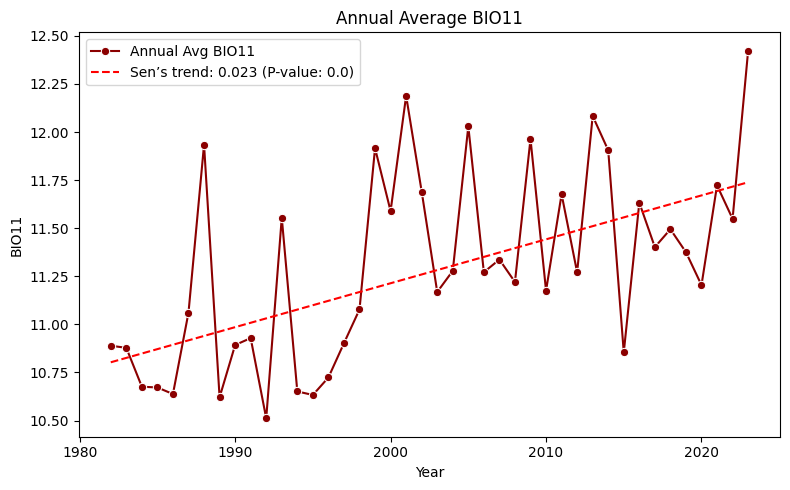

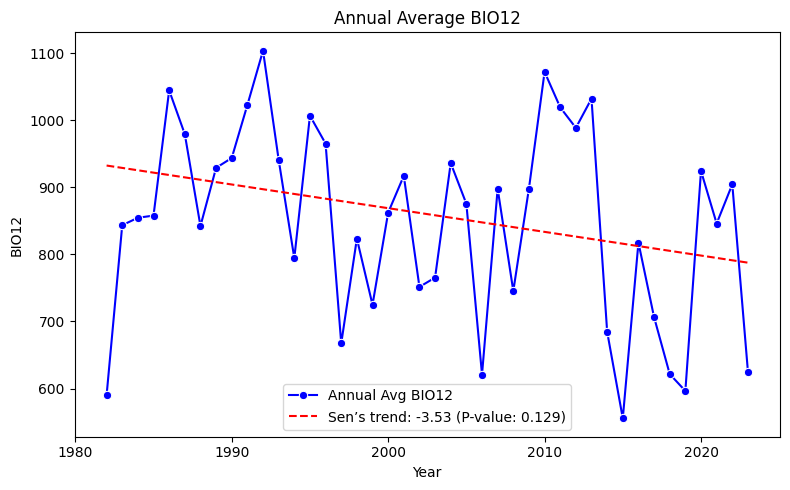

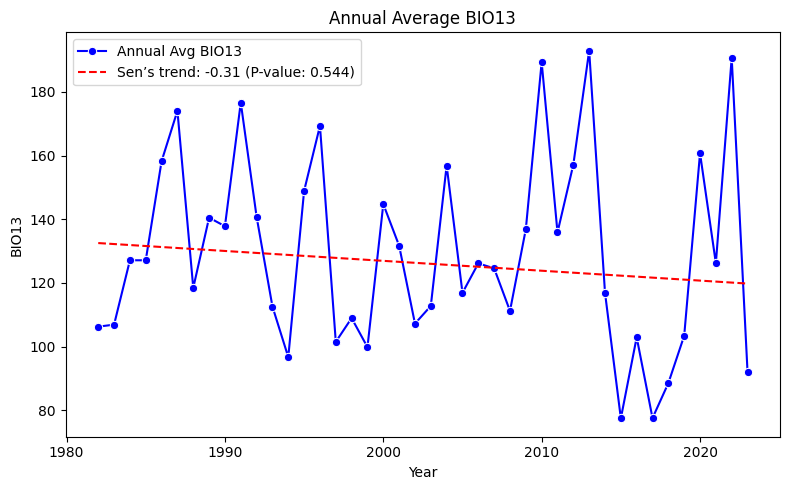

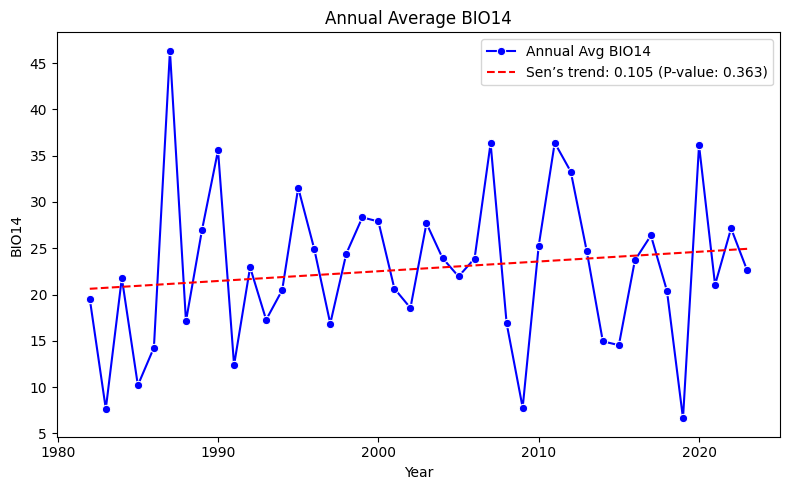

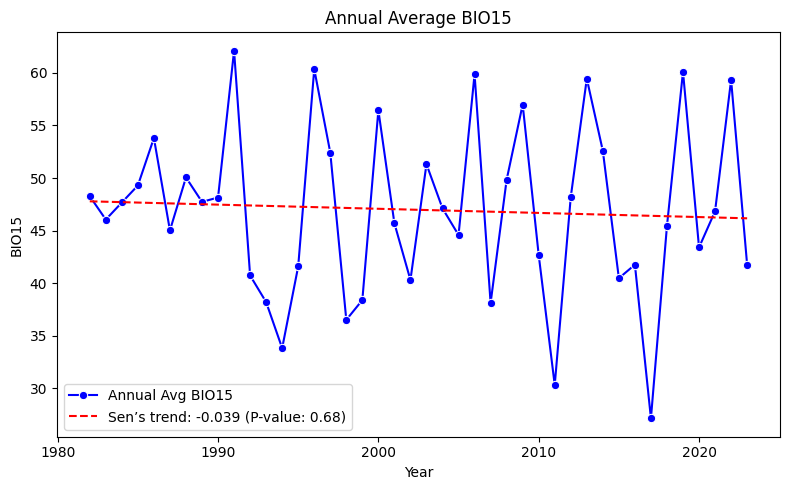

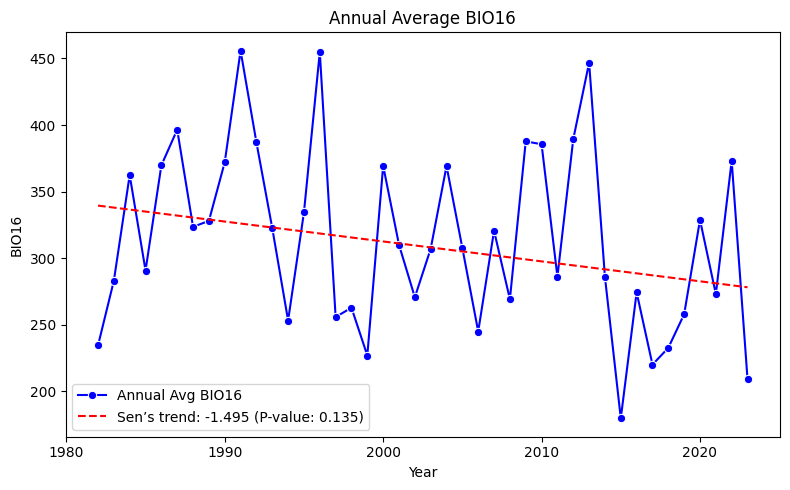

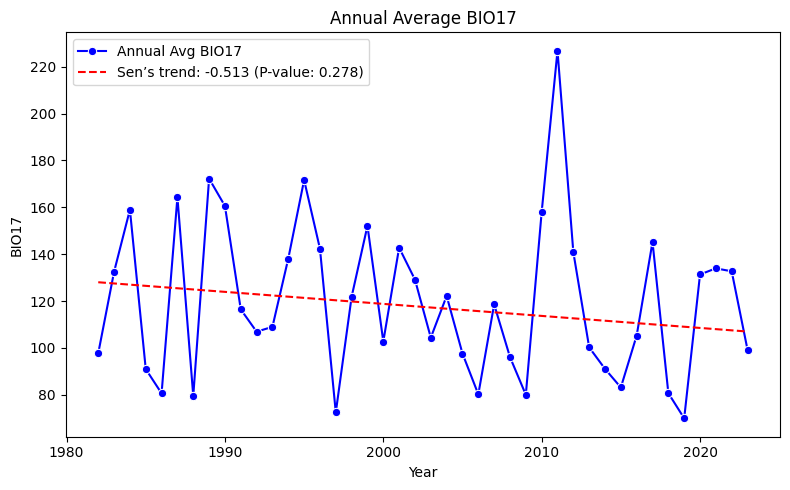

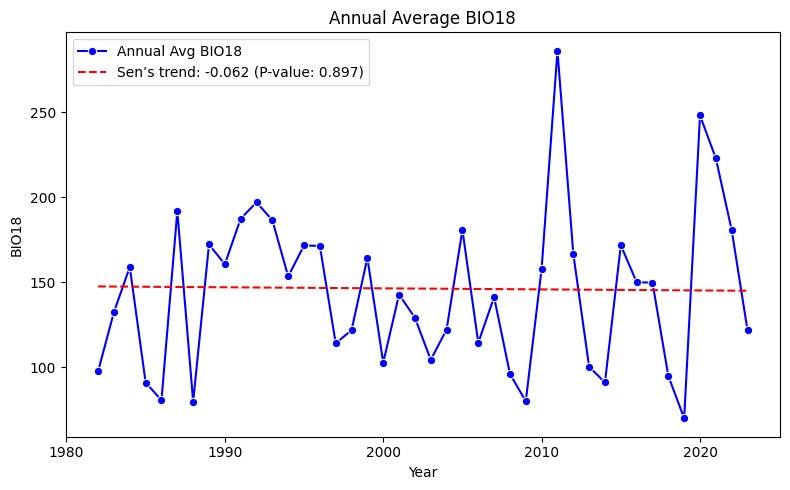

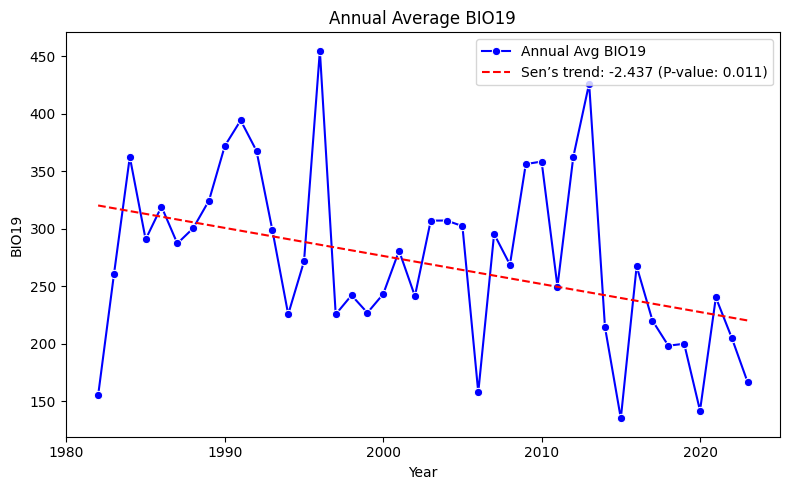

In [6]:
bio_dataset.plot_trend()
